In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/aminer-academic-citation-dataset/dblp-ref-3.json
/kaggle/input/aminer-academic-citation-dataset/AMiner-Coauthor.txt
/kaggle/input/aminer-academic-citation-dataset/dblp-ref-2.json
/kaggle/input/aminer-academic-citation-dataset/citation-network2.txt
/kaggle/input/aminer-academic-citation-dataset/dblp-ref-0.json
/kaggle/input/aminer-academic-citation-dataset/AMiner-Author.txt
/kaggle/input/aminer-academic-citation-dataset/dblp-ref-1.json


In [2]:
import pandas as pd

# List of file paths
file_paths = [
    "/kaggle/input/aminer-academic-citation-dataset/dblp-ref-0.json",
    #"/kaggle/input/aminer-academic-citation-dataset/dblp-ref-1.json",
    #"/kaggle/input/aminer-academic-citation-dataset/dblp-ref-2.json",
    #"/kaggle/input/aminer-academic-citation-dataset/dblp-ref-3.json"
]

# Read and concatenate all files
dfs = [pd.read_json(path, lines=True) for path in file_paths]
df_all = pd.concat(dfs, ignore_index=True)

# Show basic info
print(df_all.shape)
df_all.head()


(1000000, 8)


,abstract,authors,n_citation,references,title,venue,year,id
0,The purpose of this study is to develop a lear...,"[Makoto Satoh, Ryo Muramatsu, Mizue Kayama, Ka...",0,"[51c7e02e-f5ed-431a-8cf5-f761f266d4be, 69b625b...",Preliminary Design of a Network Protocol Learn...,international conference on human-computer int...,2013,00127ee2-cb05-48ce-bc49-9de556b93346
1,This paper describes the design and implementa...,"[Gareth Beale, Graeme Earl]",50,"[10482dd3-4642-4193-842f-85f3b70fcf65, 3133714...",A methodology for the physically accurate visu...,visual analytics science and technology,2011,001c58d3-26ad-46b3-ab3a-c1e557d16821
2,This article applied GARCH model instead AR or...,"[Altaf Hossain, Faisal Zaman, Mohammed Nasser,...",50,"[2d84c0f2-e656-4ce7-b018-90eda1c132fe, a083a1b...","Comparison of GARCH, Neural Network and Suppor...",pattern recognition and machine intelligence,2009,001c8744-73c4-4b04-9364-22d31a10dbf1
3,NaN,"[Jea-Bum Park, Byungmok Kim, Jian Shen, Sun-Yo...",0,"[8c78e4b0-632b-4293-b491-85b1976675e6, 9cdc54f...",Development of Remote Monitoring and Control D...,,2011,00338203-9eb3-40c5-9f31-cbac73a519ec
4,NaN,"[Giovanna Guerrini, Isabella Merlo]",2,NaN,Reasonig about Set-Oriented Methods in Object ...,,1998,0040b022-1472-4f70-a753-74832df65266


In [3]:
pip install re

ERROR: Could not find a version that satisfies the requirement re (from versions: none)
ERROR: No matching distribution found for re
Note: you may need to restart the kernel to use updated packages.


In [4]:
df_null=df_all.copy()

In [5]:
df_null.isnull().sum()

abstract      246354
authors            0
n_citation         0
references    138520
title              0
venue              0
year               0
id                 0
dtype: int64

In [6]:
df_null.dropna(inplace=True)

In [7]:
df_null.isnull().sum()

abstract      0
authors       0
n_citation    0
references    0
title         0
venue         0
year          0
id            0
dtype: int64

In [8]:
df_null.shape

(709207, 8)

In [9]:
df_null = df_null[
    df_null['references'].notna() & 
    (df_null['references'] != '') & 
    (df_null['references'].apply(lambda x: x != []))
]


In [10]:
df_null.drop_duplicates(subset=['id'], keep='first', inplace=True)
df_null.reset_index(drop= True,inplace = True)

In [11]:
df_id=df_null[['id','title','abstract','n_citation','references']]
df_references=df_null[['id','references']]

In [12]:
df_id=df_id.iloc[0:400000].copy()
df_id

,id,title,abstract,n_citation,references
0,00127ee2-cb05-48ce-bc49-9de556b93346,Preliminary Design of a Network Protocol Learn...,The purpose of this study is to develop a lear...,0,"[51c7e02e-f5ed-431a-8cf5-f761f266d4be, 69b625b..."
1,001c58d3-26ad-46b3-ab3a-c1e557d16821,A methodology for the physically accurate visu...,This paper describes the design and implementa...,50,"[10482dd3-4642-4193-842f-85f3b70fcf65, 3133714..."
2,001c8744-73c4-4b04-9364-22d31a10dbf1,"Comparison of GARCH, Neural Network and Suppor...",This article applied GARCH model instead AR or...,50,"[2d84c0f2-e656-4ce7-b018-90eda1c132fe, a083a1b..."
3,00a119c4-d367-4607-b3c8-b237f2971bff,Identifying Psychological Theme Words from Emo...,Recent achievements in Natural Language Proces...,0,"[84d47128-58d0-4187-aa44-389fde7d5c83, e0dce69..."
4,00c85316-bddf-4bcb-93f5-097adadd73c2,Relational Abstract Interpretation of Higher O...,Most applications of the abstract interpretati...,50,"[6e8a3ec3-9a99-4fac-ac4d-f8d1bf0fa208, 7bb71af..."
...,...,...,...,...,...
399995,cb2f9fb0-6e78-4f0c-bbd3-d2ade4e72b27,Creative computing for decision making: Combin...,Our research aims to improve the Traditional D...,0,"[1c795ea8-881c-4840-8539-7dee0eddc5ab, 2dd289c..."
399996,cb2fb552-9285-4765-a079-3ccd214b648b,Predicting Energy Demand Peak Using M5 Model T...,Predicting energy demand peak is a key factor ...,3,"[043c36b8-498a-428c-baf9-9ba2b48512f2, 652c1b2..."
399997,cb2fc9ad-1189-4651-9b01-08667b481f6c,Data-driven depth map refinement via multi-sca...,Depth maps captured by consumer-level depth ca...,27,"[031bbeb0-4dc1-46f9-9984-109c3b3eefae, 0e859ce..."
399998,cb2ff562-f24c-4953-9419-96800971070b,Data Driven Condition Monitoring of Wind Power...,Along with the rapid growth of the wind energy...,2,"[0bcc4f37-d1c8-4fc1-9e0a-a5bc41be9d14, 19ed289..."


In [13]:
df_id['original_title']=df_id['title']

In [14]:
df_id1=df_id.copy()

In [15]:
df_id = df_id.applymap(lambda x: x.lower() if isinstance(x, str) else x)


<ipython-input-15-1ccd229531a3>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_id = df_id.applymap(lambda x: x.lower() if isinstance(x, str) else x)


In [16]:
import re 
url_pattern = re.compile(r'https?://\S+')

# Define a function to remove URLs from text
def remove_urls(text):
    if isinstance(text, list):
        # Join list into a single string
        text = ' '.join(text)
    return url_pattern.sub('', text)

# Apply the function to the 'title' and 'abstract' columns and create new columns 'clean_title' and 'clean_abstract'
df_id['title'] = df_id['title'].apply(remove_urls)
df_id['abstract'] = df_id['abstract'].apply(remove_urls)


In [17]:
df_id['title'] = df_id['title'].replace(to_replace=r'[^\w\s\b\d+]', value='', regex=True)
df_id['abstract'] = df_id['abstract'].replace(to_replace=r'[^\w\s\b\d+\b]', value='', regex=True)

In [18]:
df_id['title'] = df_id['title'].replace(to_replace=r'\d', value='', regex=True)
df_id['abstract'] = df_id['abstract'].replace(to_replace=r'\d', value='', regex=True)

In [19]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [20]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /usr/share/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [21]:
from nltk.corpus import stopwords

# Download the stopwords dataset if not already available
import nltk
nltk.download('stopwords')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
from nltk.tokenize import word_tokenize
df_id['title'] = df_id['title'].apply(word_tokenize)

In [23]:
df_id['abstract'] = df_id['abstract'].apply(word_tokenize)

In [24]:
stop_words = set(stopwords.words('english'))
df_id['title'] = df_id['title'].apply(lambda x: [word for word in x if word not in stop_words])
df_id['abstract'] = df_id['abstract'].apply(lambda x: [word for word in x if word not in stop_words])

In [25]:
import nltk
nltk.download('wordnet')  # Download wordnet corpus
nltk.download('omw-1.4')  # Download Open Multilingual Wordnet for multilingual support
# Download the wordnet resource

# If you're using lemmatization or other operations requiring wordnet



[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [26]:
pip install spacy

Note: you may need to restart the kernel to use updated packages.


In [27]:
# import spacy
# nlp = spacy.load('en_core_web_sm')

# df_id['title'] = df_id['title'].apply(lambda x: [token.lemma_ for token in nlp(" ".join(x))])
# df_id['abstract'] = df_id['abstract'].apply(lambda x: [token.lemma_ for token in nlp(" ".join(x))])


In [28]:
# from nltk.stem import WordNetLemmatizer
# from nltk.corpus import wordnet
# # Initialize the lemmatizer
# lemmatizer = WordNetLemmatizer()
# # Apply lemmatization
# df_id['title'] = df_id['title'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
# df_id['abstract'] = df_id['abstract'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])


In [29]:
from nltk.stem import PorterStemmer, WordNetLemmatizer
# Initialize the Porter Stemmer
stemmer = PorterStemmer()

# Define a function to perform stemming on the 'text' column
def stem_words(words):
    return [stemmer.stem(word) for word in words]
# Apply the function to the 'text' column and create a new column 'stemmed_text'
df_id['title'] = df_id['title'].apply(stem_words)
df_id['abstract'] = df_id['abstract'].apply(stem_words)

In [30]:
df_id1=df_id.copy()

In [31]:
df_id2=df_id1[['id','references']]

In [32]:
df_id.head()

,id,title,abstract,n_citation,references,original_title
0,00127ee2-cb05-48ce-bc49-9de556b93346,"[preliminari, design, network, protocol, learn...","[purpos, studi, develop, learn, tool, high, sc...",0,"[51c7e02e-f5ed-431a-8cf5-f761f266d4be, 69b625b...",preliminary design of a network protocol learn...
1,001c58d3-26ad-46b3-ab3a-c1e557d16821,"[methodolog, physic, accur, visualis, roman, p...","[paper, describ, design, implement, methodolog...",50,"[10482dd3-4642-4193-842f-85f3b70fcf65, 3133714...",a methodology for the physically accurate visu...
2,001c8744-73c4-4b04-9364-22d31a10dbf1,"[comparison, garch, neural, network, support, ...","[articl, appli, garch, model, instead, ar, arm...",50,"[2d84c0f2-e656-4ce7-b018-90eda1c132fe, a083a1b...","comparison of garch, neural network and suppor..."
3,00a119c4-d367-4607-b3c8-b237f2971bff,"[identifi, psycholog, theme, word, emot, annot...","[recent, achiev, natur, languag, process, nlp,...",0,"[84d47128-58d0-4187-aa44-389fde7d5c83, e0dce69...",identifying psychological theme words from emo...
4,00c85316-bddf-4bcb-93f5-097adadd73c2,"[relat, abstract, interpret, higher, order, fu...","[applic, abstract, interpret, framework, foran...",50,"[6e8a3ec3-9a99-4fac-ac4d-f8d1bf0fa208, 7bb71af...",relational abstract interpretation of higher o...


In [33]:
pip install faiss-gpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.5/85.5 MB 20.3 MB/s eta 0:00:00:00:0100:01
Note: you may need to restart the kernel to use updated packages.


In [34]:
pip install bert_score

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 2.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


Using device: cuda


config.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/228k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/442M [00:00<?, ?B/s]

Added 166 embeddings to FAISS index.
Added 166 embeddings to FAISS index.
Added 166 embeddings to FAISS index.
Added 166 embeddings to FAISS index.
Added 166 embeddings to FAISS index.
Added 166 embeddings to FAISS index.
Added 166 embeddings to FAISS index.
Added 166 embeddings to FAISS index.
Added 166 embeddings to FAISS index.
Added 166 embeddings to FAISS index.
Added 166 embeddings to FAISS index.
Added 166 embeddings to FAISS index.
Added 166 embeddings to FAISS index.
Added 166 embeddings to FAISS index.
Added 166 embeddings to FAISS index.
Added 166 embeddings to FAISS index.
Added 166 embeddings to FAISS index.
Added 166 embeddings to FAISS index.
Added 166 embeddings to FAISS index.
Added 166 embeddings to FAISS index.
Added 166 embeddings to FAISS index.
Added 166 embeddings to FAISS index.
Added 166 embeddings to FAISS index.
Added 166 embeddings to FAISS index.
Added 166 embeddings to FAISS index.
Added 166 embeddings to FAISS index.
Added 166 embeddings to FAISS index.
A

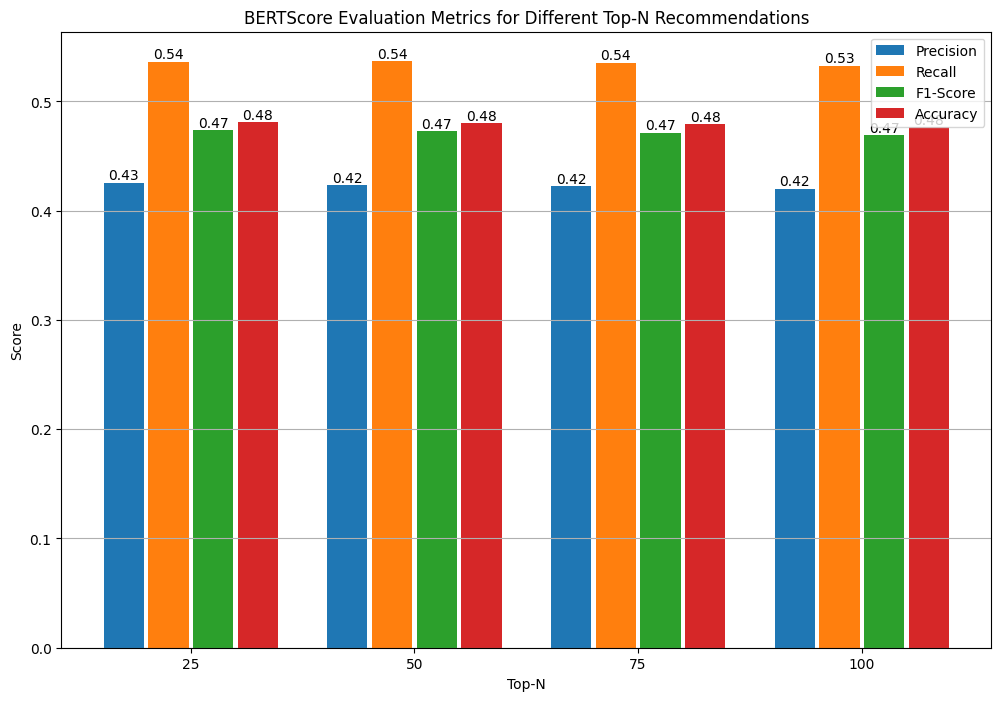

In [35]:
import torch
import numpy as np
import pandas as pd
from transformers import AutoTokenizer, AutoModel
from scipy.spatial.distance import cosine
import faiss
from sklearn.metrics import accuracy_score
import bert_score
import matplotlib.pyplot as plt
from difflib import get_close_matches

# Check if GPU is available and move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")  # Optional, to confirm if you're using GPU

# Load the SciBERT model and tokenizer
model_name = "allenai/scibert_scivocab_uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name).to(device)  # Move model to device

# Function to get embeddings
def get_embeddings(text):
    inputs = tokenizer(text, return_tensors='pt', padding=True, truncation=True, max_length=512)
    inputs = {key: value.to(device) for key, value in inputs.items()}  # Move inputs to GPU if available
    with torch.no_grad():
        embeddings = model(**inputs).last_hidden_state.mean(dim=1)
    return embeddings

# Example dataframe processing
df_id['title'] = df_id['title'].astype(str)
df_id['abstract'] = df_id['abstract'].apply(lambda x: ' '.join(x) if isinstance(x, list) else str(x))
df_id['combined_text'] = df_id['title'] + " " + df_id['abstract']
df_id['text_embeddings'] = df_id['combined_text'].apply(lambda x: get_embeddings(x).squeeze().cpu().numpy().tolist())  # Move to CPU for FAISS

# Initialize FAISS index for embeddings (use GPU version if GPU is available)
dim = len(df_id['text_embeddings'][0])  # Dimension of the embeddings
index = faiss.IndexFlatL2(dim)  # Using L2 distance (Euclidean)

# If using GPU, move the index to GPU
if torch.cuda.is_available():
    res = faiss.StandardGpuResources()  # Initialize GPU resources
    index = faiss.index_cpu_to_gpu(res, 0, index)  # Move index to GPU

# Function to add embeddings to FAISS index
def add_embeddings_to_faiss(embeddings, ids):
    faiss_embeddings = np.array(embeddings).astype('float32')
    index.add(faiss_embeddings)
    print(f"Added {len(ids)} embeddings to FAISS index.")

# Function to split a list into smaller chunks
def split_into_batches(data, batch_size):
    for i in range(0, len(data), batch_size):
        yield data[i:i + batch_size]

# Set batch size to 166
batch_size = 166

# Split the ids, embeddings, and metadata into smaller batches
id_batches = list(split_into_batches(df_id["id"].tolist(), batch_size))
embedding_batches = list(split_into_batches(df_id["text_embeddings"].tolist(), batch_size))
metadata_batches = list(split_into_batches(df_id[["title", "abstract"]].to_dict(orient="records"), batch_size))

# Add each batch to FAISS index
for id_batch, embedding_batch in zip(id_batches, embedding_batches):
    add_embeddings_to_faiss(embedding_batch, id_batch)

print("Embeddings added successfully to FAISS index.")

# Function to compute cosine similarity
def compute_cosine_similarity(vec1, vec2):
    return 1 - cosine(vec1, vec2)  # Cosine similarity is 1 - cosine distance

# Function to find similar texts using FAISS
def find_similar_texts_faiss(user_input, top_n=5):
    user_embedding = get_embeddings(user_input).squeeze().to(device).cpu().numpy().astype('float32')
    distances, indices = index.search(np.array([user_embedding]), top_n)  # Perform the search
    similar_papers = [(df_id.iloc[idx]['id'], distances[0][i]) for i, idx in enumerate(indices[0])]
    return similar_papers

# Function to find and re-rank similar texts
def find_and_rerank_similar_texts(user_input, top_n=5):
    similar_texts = find_similar_texts_faiss(user_input, top_n)
    return similar_texts  # For simplicity, returning the same list

# Function to recommend papers, excluding the input paper itself
def recommend_papers_faiss(user_input, input_paper_id, top_n=5):
    similar_texts = find_and_rerank_similar_texts(user_input, top_n)
    return [paper for paper in similar_texts if paper[0] != input_paper_id]  # Exclude the input paper

# BERTScore-based function for evaluating precision, recall, F1-score
# BERTScore-based function for evaluating precision, recall, F1-score, and accuracy
def evaluate_bertscore(user_input, recommended_texts, similarity_threshold=0.7):
    # Use BERTScore to evaluate based on token similarity
    references = [user_input] * len(recommended_texts)  # The user input is the reference text
    candidates = [text for _, text in recommended_texts]  # The recommended paper texts are the candidates
    
    P, R, F1 = bert_score.score(candidates, references, model_type=model_name, lang="en", rescale_with_baseline=True)
    
    precision = P.mean().item()
    recall = R.mean().item()
    f1_score = F1.mean().item()
    accuracy = (precision + recall) / 2
#     return precision, recall, f1, accuracy
    # Calculate accuracy based on a similarity threshold (e.g., consider papers with similarity > 0.8 as relevant)
    #accuracy = sum([sim >= similarity_threshold for sim in R]) / len(R)
    
    return precision, recall, f1_score, accuracy  # Return four values

# Function to recommend and evaluate papers with BERTScore and Accuracy
def recommend_and_evaluate(user_input, input_paper_id, top_n=5):
    recommended_papers = recommend_papers_faiss(user_input, input_paper_id, top_n)
    recommended_texts = [(paper_id, df_id[df_id["id"] == paper_id]["combined_text"].values[0]) for paper_id, sim in recommended_papers]
    
    precision, recall, f1, accuracy = evaluate_bertscore(user_input, recommended_texts)  # Unpack all four values
    
    return precision, recall, f1, accuracy  # Return all four values

# Example user input and input paper ID
user_input = "A methodology for the physically accurate visualisation of roman polychrome statuary"
input_paper_title = user_input.strip().lower()  # Example input paper title

# Match paper title to ID with error handling
matching_ids = df_id[df_id['original_title'].str.strip().str.lower() == input_paper_title]['id']
if matching_ids.empty:
    potential_matches = get_close_matches(input_paper_title, df_id['original_title'].str.strip().str.lower().tolist(), n=1, cutoff=0.2)
    if not potential_matches:
        raise ValueError("No matching paper found for the input title.")
    input_paper_id = df_id[df_id['original_title'].str.strip().str.lower() == potential_matches[0]]['id'].values[0]
else:
    input_paper_id = matching_ids.values[0]

# Top-N values to evaluate
top_n_values = [25, 50, 75, 100]

# Dictionary to store results
results = {
    "Top-N": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": [],
    "Accuracy": []  # Add accuracy to results
}

# Run evaluations for each top-N value
for top_n in top_n_values:
    precision, recall, f1, accuracy = recommend_and_evaluate(user_input, input_paper_id, top_n)
    
    # Store results
    results["Top-N"].append(top_n)
    results["Precision"].append(precision)
    results["Recall"].append(recall)
    results["F1-Score"].append(f1)
    results["Accuracy"].append(accuracy)  # Store accuracy

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Updated function to plot metrics for different Top-N values as bar charts with values showing up to 2 decimal places
def plot_metrics_for_top_n(results_df):
    metrics = ['Precision', 'Recall', 'F1-Score', 'Accuracy']  # Include Accuracy
    plt.figure(figsize=(12, 8))
    
    # Setting reduced width for the bars to create more space between them
    bar_width = 0.18
    index = np.arange(len(results_df['Top-N']))
    
    # Adjust each metric to create slight space between the bars
    for i, metric in enumerate(metrics):
        bars = plt.bar(index + i * (bar_width + 0.02), results_df[metric], bar_width, label=metric)
        
        # Add the values on top of each bar, formatted to 2 decimal places
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.2f}', 
                     ha='center', va='bottom')  # Display values with 2 decimal places
    
    # Setting the x-ticks in the middle of the bars
    plt.xticks(index + bar_width * (len(metrics) / 2 - 0.5) + 0.03, results_df['Top-N'])
    
    plt.xlabel('Top-N')
    plt.ylabel('Score')
    plt.title('BERTScore Evaluation Metrics for Different Top-N Recommendations')
    plt.legend()
    plt.grid(True, axis='y')
    plt.show()

# Call the updated function to plot metrics for different Top-N values with 2 decimal places on values
plot_metrics_for_top_n(results_df)


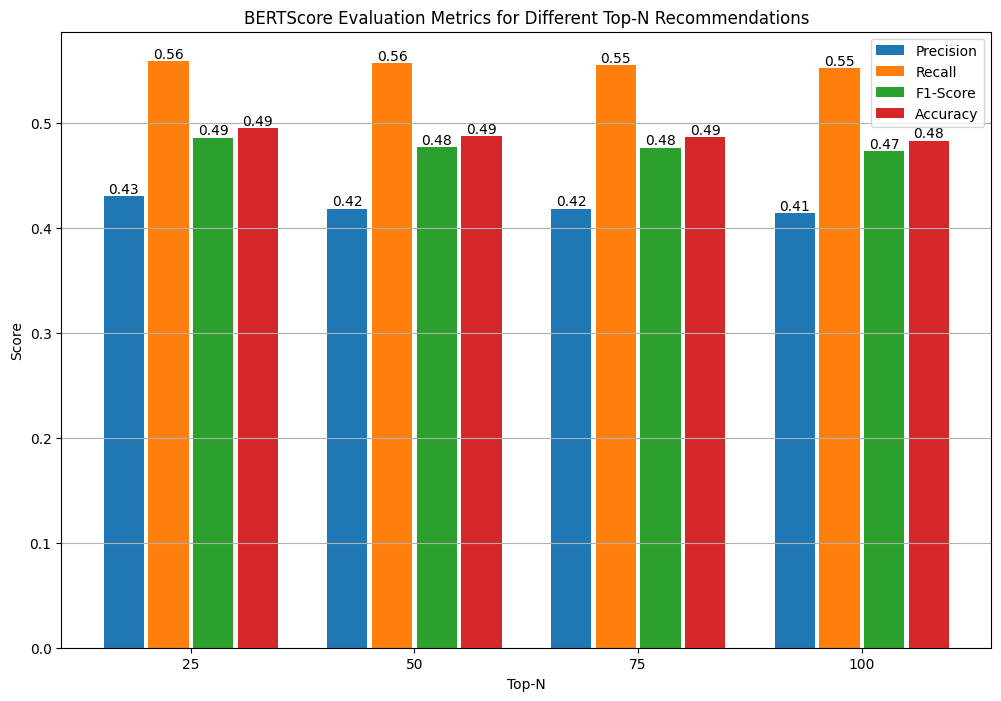

In [36]:
# BERTScore-based function for evaluating precision, recall, F1-score, and accuracy
def evaluate_bertscore(user_input, recommended_texts, similarity_threshold=0.7):
    # Use BERTScore to evaluate based on token similarity
    references = [user_input] * len(recommended_texts)  # The user input is the reference text
    candidates = [text for _, text in recommended_texts]  # The recommended paper texts are the candidates
    
    P, R, F1 = bert_score.score(candidates, references, model_type=model_name, lang="en", rescale_with_baseline=True)
    
    precision = P.mean().item()
    recall = R.mean().item()
    f1_score = F1.mean().item()
    accuracy = (precision + recall) / 2
#     return precision, recall, f1, accuracy
    # Calculate accuracy based on a similarity threshold (e.g., consider papers with similarity > 0.8 as relevant)
    #accuracy = sum([sim >= similarity_threshold for sim in R]) / len(R)
    
    return precision, recall, f1_score, accuracy  # Return four values

# Function to recommend and evaluate papers with BERTScore and Accuracy
def recommend_and_evaluate(user_input, input_paper_id, top_n=5):
    recommended_papers = recommend_papers_faiss(user_input, input_paper_id, top_n)
    recommended_texts = [(paper_id, df_id[df_id["id"] == paper_id]["combined_text"].values[0]) for paper_id, sim in recommended_papers]
    
    precision, recall, f1, accuracy = evaluate_bertscore(user_input, recommended_texts)  # Unpack all four values
    
    return precision, recall, f1, accuracy  # Return all four values

# Example user input and input paper ID
user_input = "Learning of abstractions from structural descriptions of pictures"
input_paper_title = user_input.strip().lower()  # Example input paper title

# Match paper title to ID with error handling
matching_ids = df_id[df_id['original_title'].str.strip().str.lower() == input_paper_title]['id']
if matching_ids.empty:
    potential_matches = get_close_matches(input_paper_title, df_id['original_title'].str.strip().str.lower().tolist(), n=1, cutoff=0.2)
    if not potential_matches:
        raise ValueError("No matching paper found for the input title.")
    input_paper_id = df_id[df_id['original_title'].str.strip().str.lower() == potential_matches[0]]['id'].values[0]
else:
    input_paper_id = matching_ids.values[0]

# Top-N values to evaluate
top_n_values = [25, 50, 75, 100]

# Dictionary to store results
results = {
    "Top-N": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": [],
    "Accuracy": []  # Add accuracy to results
}

# Run evaluations for each top-N value
for top_n in top_n_values:
    precision, recall, f1, accuracy = recommend_and_evaluate(user_input, input_paper_id, top_n)
    
    # Store results
    results["Top-N"].append(top_n)
    results["Precision"].append(precision)
    results["Recall"].append(recall)
    results["F1-Score"].append(f1)
    results["Accuracy"].append(accuracy)  # Store accuracy

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Updated function to plot metrics for different Top-N values as bar charts with values showing up to 2 decimal places
def plot_metrics_for_top_n(results_df):
    metrics = ['Precision', 'Recall', 'F1-Score', 'Accuracy']  # Include Accuracy
    plt.figure(figsize=(12, 8))
    
    # Setting reduced width for the bars to create more space between them
    bar_width = 0.18
    index = np.arange(len(results_df['Top-N']))
    
    # Adjust each metric to create slight space between the bars
    for i, metric in enumerate(metrics):
        bars = plt.bar(index + i * (bar_width + 0.02), results_df[metric], bar_width, label=metric)
        
        # Add the values on top of each bar, formatted to 2 decimal places
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.2f}', 
                     ha='center', va='bottom')  # Display values with 2 decimal places
    
    # Setting the x-ticks in the middle of the bars
    plt.xticks(index + bar_width * (len(metrics) / 2 - 0.5) + 0.03, results_df['Top-N'])
    
    plt.xlabel('Top-N')
    plt.ylabel('Score')
    plt.title('BERTScore Evaluation Metrics for Different Top-N Recommendations')
    plt.legend()
    plt.grid(True, axis='y')
    plt.show()

# Call the updated function to plot metrics for different Top-N values with 2 decimal places on values
plot_metrics_for_top_n(results_df)


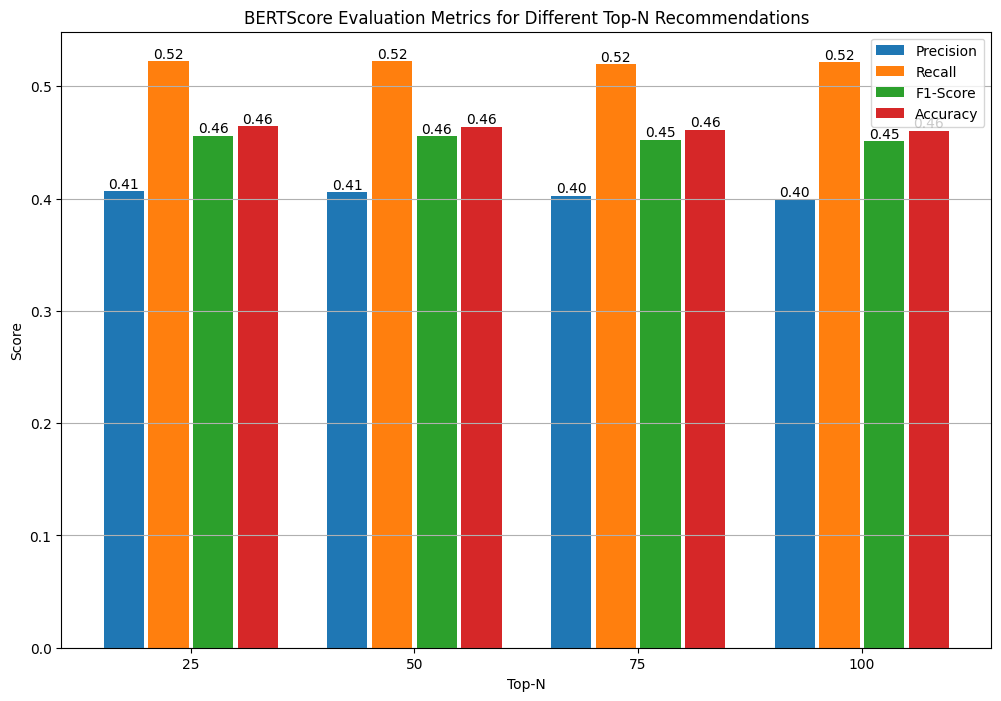

In [37]:
# BERTScore-based function for evaluating precision, recall, F1-score, and accuracy
def evaluate_bertscore(user_input, recommended_texts, similarity_threshold=0.7):
    # Use BERTScore to evaluate based on token similarity
    references = [user_input] * len(recommended_texts)  # The user input is the reference text
    candidates = [text for _, text in recommended_texts]  # The recommended paper texts are the candidates
    
    P, R, F1 = bert_score.score(candidates, references, model_type=model_name, lang="en", rescale_with_baseline=True)
    
    precision = P.mean().item()
    recall = R.mean().item()
    f1_score = F1.mean().item()
    accuracy = (precision + recall) / 2
#     return precision, recall, f1, accuracy
    # Calculate accuracy based on a similarity threshold (e.g., consider papers with similarity > 0.8 as relevant)
    #accuracy = sum([sim >= similarity_threshold for sim in R]) / len(R)
    
    return precision, recall, f1_score, accuracy  # Return four values

# Function to recommend and evaluate papers with BERTScore and Accuracy
def recommend_and_evaluate(user_input, input_paper_id, top_n=5):
    recommended_papers = recommend_papers_faiss(user_input, input_paper_id, top_n)
    recommended_texts = [(paper_id, df_id[df_id["id"] == paper_id]["combined_text"].values[0]) for paper_id, sim in recommended_papers]
    
    precision, recall, f1, accuracy = evaluate_bertscore(user_input, recommended_texts)  # Unpack all four values
    
    return precision, recall, f1, accuracy  # Return all four values

# Example user input and input paper ID
user_input = "Understanding the Role of Organizational Culture for Design and Success of Enterprise Architecture Management"
input_paper_title = user_input.strip().lower()  # Example input paper title

# Match paper title to ID with error handling
matching_ids = df_id[df_id['original_title'].str.strip().str.lower() == input_paper_title]['id']
if matching_ids.empty:
    potential_matches = get_close_matches(input_paper_title, df_id['original_title'].str.strip().str.lower().tolist(), n=1, cutoff=0.2)
    if not potential_matches:
        raise ValueError("No matching paper found for the input title.")
    input_paper_id = df_id[df_id['original_title'].str.strip().str.lower() == potential_matches[0]]['id'].values[0]
else:
    input_paper_id = matching_ids.values[0]

# Top-N values to evaluate
top_n_values = [25, 50, 75, 100]

# Dictionary to store results
results = {
    "Top-N": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": [],
    "Accuracy": []  # Add accuracy to results
}

# Run evaluations for each top-N value
for top_n in top_n_values:
    precision, recall, f1, accuracy = recommend_and_evaluate(user_input, input_paper_id, top_n)
    
    # Store results
    results["Top-N"].append(top_n)
    results["Precision"].append(precision)
    results["Recall"].append(recall)
    results["F1-Score"].append(f1)
    results["Accuracy"].append(accuracy)  # Store accuracy

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Updated function to plot metrics for different Top-N values as bar charts with values showing up to 2 decimal places
def plot_metrics_for_top_n(results_df):
    metrics = ['Precision', 'Recall', 'F1-Score', 'Accuracy']  # Include Accuracy
    plt.figure(figsize=(12, 8))
    
    # Setting reduced width for the bars to create more space between them
    bar_width = 0.18
    index = np.arange(len(results_df['Top-N']))
    
    # Adjust each metric to create slight space between the bars
    for i, metric in enumerate(metrics):
        bars = plt.bar(index + i * (bar_width + 0.02), results_df[metric], bar_width, label=metric)
        
        # Add the values on top of each bar, formatted to 2 decimal places
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.2f}', 
                     ha='center', va='bottom')  # Display values with 2 decimal places
    
    # Setting the x-ticks in the middle of the bars
    plt.xticks(index + bar_width * (len(metrics) / 2 - 0.5) + 0.03, results_df['Top-N'])
    
    plt.xlabel('Top-N')
    plt.ylabel('Score')
    plt.title('BERTScore Evaluation Metrics for Different Top-N Recommendations')
    plt.legend()
    plt.grid(True, axis='y')
    plt.show()

# Call the updated function to plot metrics for different Top-N values with 2 decimal places on values
plot_metrics_for_top_n(results_df)


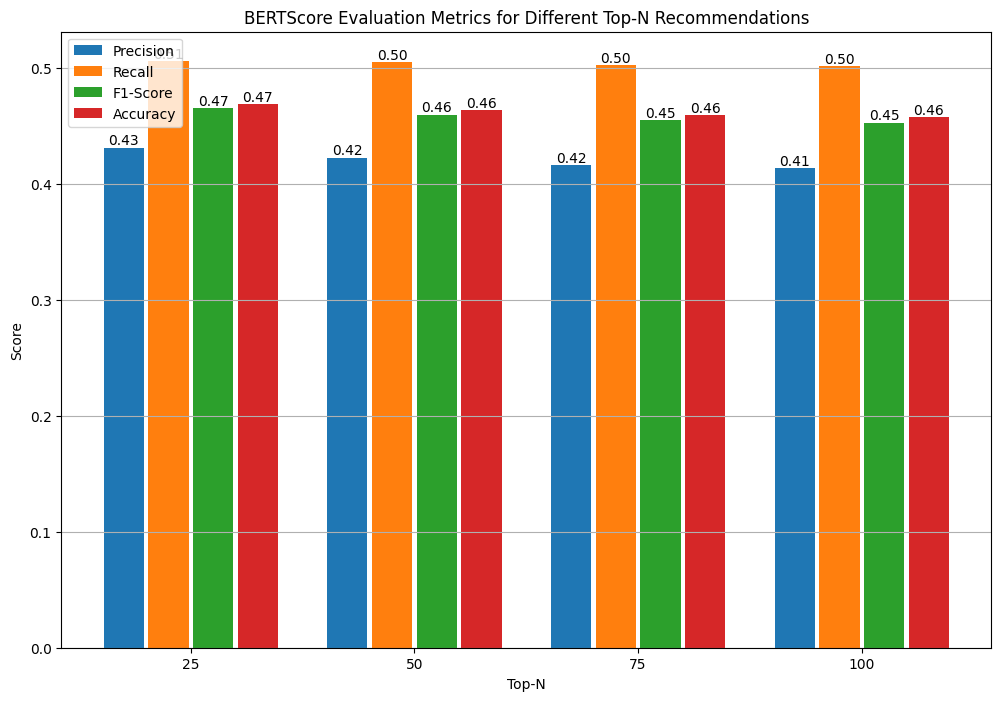

In [38]:
# BERTScore-based function for evaluating precision, recall, F1-score, and accuracy
def evaluate_bertscore(user_input, recommended_texts, similarity_threshold=0.7):
    # Use BERTScore to evaluate based on token similarity
    references = [user_input] * len(recommended_texts)  # The user input is the reference text
    candidates = [text for _, text in recommended_texts]  # The recommended paper texts are the candidates
    
    P, R, F1 = bert_score.score(candidates, references, model_type=model_name, lang="en", rescale_with_baseline=True)
    
    precision = P.mean().item()
    recall = R.mean().item()
    f1_score = F1.mean().item()
    accuracy = (precision + recall) / 2
#     return precision, recall, f1, accuracy
    # Calculate accuracy based on a similarity threshold (e.g., consider papers with similarity > 0.8 as relevant)
    #accuracy = sum([sim >= similarity_threshold for sim in R]) / len(R)
    
    return precision, recall, f1_score, accuracy  # Return four values

# Function to recommend and evaluate papers with BERTScore and Accuracy
def recommend_and_evaluate(user_input, input_paper_id, top_n=5):
    recommended_papers = recommend_papers_faiss(user_input, input_paper_id, top_n)
    recommended_texts = [(paper_id, df_id[df_id["id"] == paper_id]["combined_text"].values[0]) for paper_id, sim in recommended_papers]
    
    precision, recall, f1, accuracy = evaluate_bertscore(user_input, recommended_texts)  # Unpack all four values
    
    return precision, recall, f1, accuracy  # Return all four values

# Example user input and input paper ID
user_input = "Extensions for 3d graphics rendering engine used for direct tessellation of spline surfaces"
input_paper_title = user_input.strip().lower()  # Example input paper title

# Match paper title to ID with error handling
matching_ids = df_id[df_id['original_title'].str.strip().str.lower() == input_paper_title]['id']
if matching_ids.empty:
    potential_matches = get_close_matches(input_paper_title, df_id['original_title'].str.strip().str.lower().tolist(), n=1, cutoff=0.2)
    if not potential_matches:
        raise ValueError("No matching paper found for the input title.")
    input_paper_id = df_id[df_id['original_title'].str.strip().str.lower() == potential_matches[0]]['id'].values[0]
else:
    input_paper_id = matching_ids.values[0]

# Top-N values to evaluate
top_n_values = [25, 50, 75, 100]

# Dictionary to store results
results = {
    "Top-N": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": [],
    "Accuracy": []  # Add accuracy to results
}

# Run evaluations for each top-N value
for top_n in top_n_values:
    precision, recall, f1, accuracy = recommend_and_evaluate(user_input, input_paper_id, top_n)
    
    # Store results
    results["Top-N"].append(top_n)
    results["Precision"].append(precision)
    results["Recall"].append(recall)
    results["F1-Score"].append(f1)
    results["Accuracy"].append(accuracy)  # Store accuracy

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Updated function to plot metrics for different Top-N values as bar charts with values showing up to 2 decimal places
def plot_metrics_for_top_n(results_df):
    metrics = ['Precision', 'Recall', 'F1-Score', 'Accuracy']  # Include Accuracy
    plt.figure(figsize=(12, 8))
    
    # Setting reduced width for the bars to create more space between them
    bar_width = 0.18
    index = np.arange(len(results_df['Top-N']))
    
    # Adjust each metric to create slight space between the bars
    for i, metric in enumerate(metrics):
        bars = plt.bar(index + i * (bar_width + 0.02), results_df[metric], bar_width, label=metric)
        
        # Add the values on top of each bar, formatted to 2 decimal places
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.2f}', 
                     ha='center', va='bottom')  # Display values with 2 decimal places
    
    # Setting the x-ticks in the middle of the bars
    plt.xticks(index + bar_width * (len(metrics) / 2 - 0.5) + 0.03, results_df['Top-N'])
    
    plt.xlabel('Top-N')
    plt.ylabel('Score')
    plt.title('BERTScore Evaluation Metrics for Different Top-N Recommendations')
    plt.legend()
    plt.grid(True, axis='y')
    plt.show()

# Call the updated function to plot metrics for different Top-N values with 2 decimal places on values
plot_metrics_for_top_n(results_df)


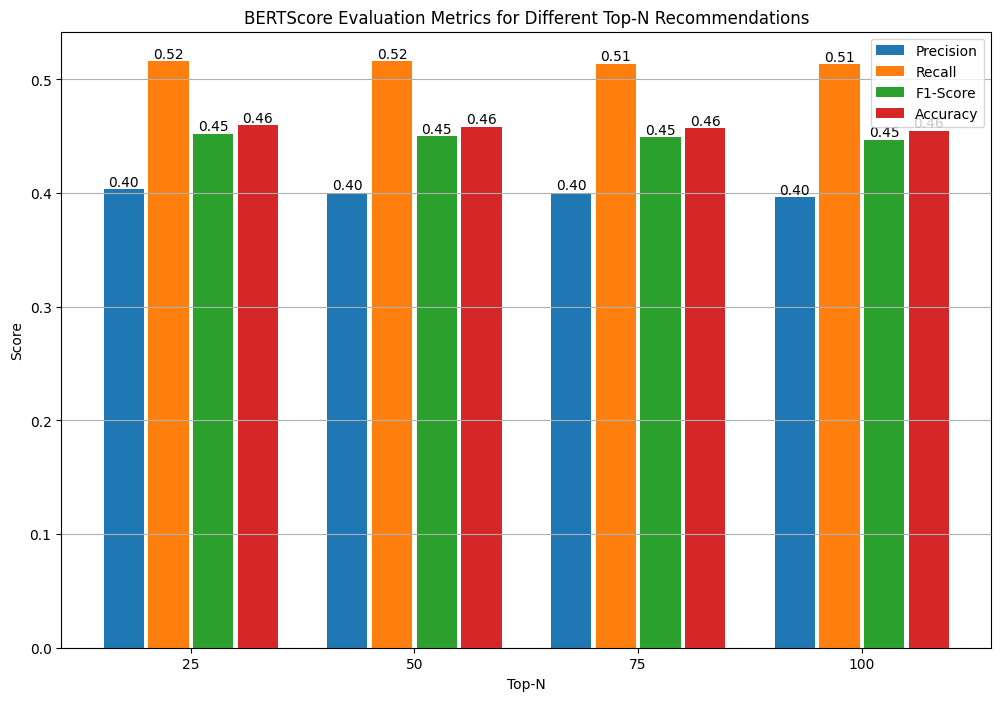

In [39]:
# BERTScore-based function for evaluating precision, recall, F1-score, and accuracy
def evaluate_bertscore(user_input, recommended_texts, similarity_threshold=0.7):
    # Use BERTScore to evaluate based on token similarity
    references = [user_input] * len(recommended_texts)  # The user input is the reference text
    candidates = [text for _, text in recommended_texts]  # The recommended paper texts are the candidates
    
    P, R, F1 = bert_score.score(candidates, references, model_type=model_name, lang="en", rescale_with_baseline=True)
    
    precision = P.mean().item()
    recall = R.mean().item()
    f1_score = F1.mean().item()
    accuracy = (precision + recall) / 2
#     return precision, recall, f1, accuracy
    # Calculate accuracy based on a similarity threshold (e.g., consider papers with similarity > 0.8 as relevant)
    #accuracy = sum([sim >= similarity_threshold for sim in R]) / len(R)
    
    return precision, recall, f1_score, accuracy  # Return four values

# Function to recommend and evaluate papers with BERTScore and Accuracy
def recommend_and_evaluate(user_input, input_paper_id, top_n=5):
    recommended_papers = recommend_papers_faiss(user_input, input_paper_id, top_n)
    recommended_texts = [(paper_id, df_id[df_id["id"] == paper_id]["combined_text"].values[0]) for paper_id, sim in recommended_papers]
    
    precision, recall, f1, accuracy = evaluate_bertscore(user_input, recommended_texts)  # Unpack all four values
    
    return precision, recall, f1, accuracy  # Return all four values

# Example user input and input paper ID
user_input = "A Clinical Pathway Mining Approach to Enable Scheduling of Hospital Relocations and Treatment Services"
input_paper_title = user_input.strip().lower()  # Example input paper title

# Match paper title to ID with error handling
matching_ids = df_id[df_id['original_title'].str.strip().str.lower() == input_paper_title]['id']
if matching_ids.empty:
    potential_matches = get_close_matches(input_paper_title, df_id['original_title'].str.strip().str.lower().tolist(), n=1, cutoff=0.2)
    if not potential_matches:
        raise ValueError("No matching paper found for the input title.")
    input_paper_id = df_id[df_id['original_title'].str.strip().str.lower() == potential_matches[0]]['id'].values[0]
else:
    input_paper_id = matching_ids.values[0]

# Top-N values to evaluate
top_n_values = [25, 50, 75, 100]

# Dictionary to store results
results = {
    "Top-N": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": [],
    "Accuracy": []  # Add accuracy to results
}

# Run evaluations for each top-N value
for top_n in top_n_values:
    precision, recall, f1, accuracy = recommend_and_evaluate(user_input, input_paper_id, top_n)
    
    # Store results
    results["Top-N"].append(top_n)
    results["Precision"].append(precision)
    results["Recall"].append(recall)
    results["F1-Score"].append(f1)
    results["Accuracy"].append(accuracy)  # Store accuracy

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Updated function to plot metrics for different Top-N values as bar charts with values showing up to 2 decimal places
def plot_metrics_for_top_n(results_df):
    metrics = ['Precision', 'Recall', 'F1-Score', 'Accuracy']  # Include Accuracy
    plt.figure(figsize=(12, 8))
    
    # Setting reduced width for the bars to create more space between them
    bar_width = 0.18
    index = np.arange(len(results_df['Top-N']))
    
    # Adjust each metric to create slight space between the bars
    for i, metric in enumerate(metrics):
        bars = plt.bar(index + i * (bar_width + 0.02), results_df[metric], bar_width, label=metric)
        
        # Add the values on top of each bar, formatted to 2 decimal places
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.2f}', 
                     ha='center', va='bottom')  # Display values with 2 decimal places
    
    # Setting the x-ticks in the middle of the bars
    plt.xticks(index + bar_width * (len(metrics) / 2 - 0.5) + 0.03, results_df['Top-N'])
    
    plt.xlabel('Top-N')
    plt.ylabel('Score')
    plt.title('BERTScore Evaluation Metrics for Different Top-N Recommendations')
    plt.legend()
    plt.grid(True, axis='y')
    plt.show()

# Call the updated function to plot metrics for different Top-N values with 2 decimal places on values
plot_metrics_for_top_n(results_df)


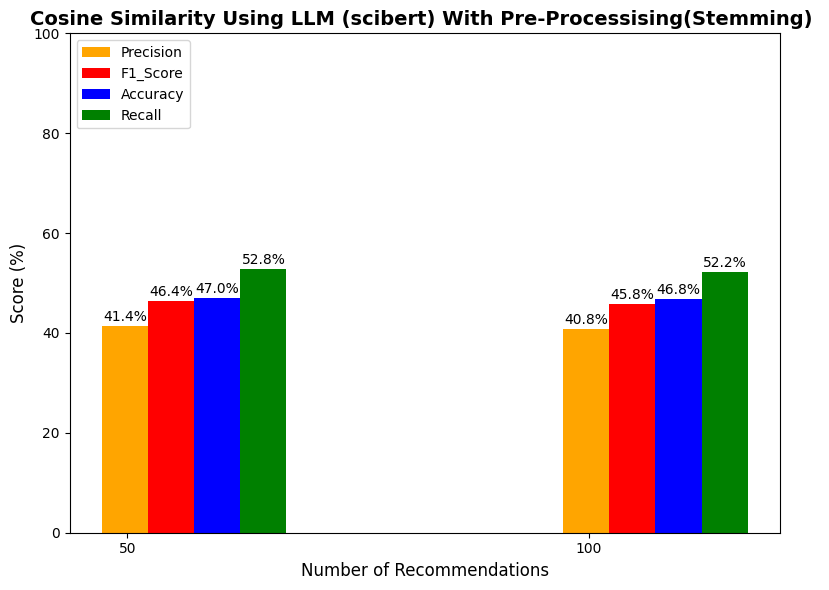

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Input data
# Input data
results = {
    'Recommendations': [ 50,100],
    'Accuracy': [
        [0.46, 0.46, 0.46, 0.49, 0.48],
        [0.46, 0.46, 0.46, 0.48, 0.48]
        
    ],
    'Precision': [
        [0.40, 0.42, 0.41, 0.42, 0.42],
        [0.40, 0.41, 0.40, 0.41, 0.42]
        
    ],
    'Recall': [
        [0.52, 0.50, 0.52, 0.56, 0.54],
        [0.51, 0.50, 0.52, 0.55, 0.53]
        
    ],
    'F1_Score': [
        [0.45, 0.46, 0.46, 0.48, 0.47],
        [0.45, 0.45, 0.45, 0.47, 0.47]
    ]
}
# Compute averages for each metric at each recommendation level and convert to percentages
averaged_results = {metric: [np.mean(values) * 100 for values in metrics] for metric, metrics in results.items() if metric != 'Recommendations'}

# Define colors and order
metrics_order = ['Precision', 'F1_Score', 'Accuracy', 'Recall']
colors = {'Accuracy': 'blue', 'Precision': 'orange', 'Recall': 'green', 'F1_Score': 'red'}

# Plotting the bars
fig, ax = plt.subplots(figsize=(8, 6))
x = np.arange(len(results['Recommendations']))
width = 0.1  # Width of each bar

# Plot bars for each recommendation level
for i, rec in enumerate(results['Recommendations']):
    for j, metric in enumerate(metrics_order):
        value = averaged_results[metric][i]
        bar = ax.bar(x[i] + j * width, value, width, label=metric if i == 0 else "", color=colors[metric])

        # Add labels above each bar
        ax.text(x[i] + j * width, value + 1, f"{value:.1f}%", ha='center', fontsize=10)

# Set x-axis labels and title
ax.set_xticks(x + width * 0.05)
ax.set_xticklabels(results['Recommendations'])
ax.set_xlabel("Number of Recommendations", fontsize=12)
ax.set_ylabel("Score (%)", fontsize=12)
ax.set_title("Cosine Similarity Using LLM (scibert) With Pre-Processising(Stemming) ", fontsize=14, fontweight='bold')

# Set y-axis scale from 0 to 100
ax.set_ylim(0, 100)

# Improve legend display
ax.legend(fontsize=10, loc="upper left")

plt.tight_layout()
plt.show()


In [40]:
# pip install bert_score

In [41]:
# pip install faiss-gpu

# Jaccard With LLM

In [42]:
# import torch
# import numpy as np
# import pandas as pd
# import faiss
# from transformers import AutoTokenizer, AutoModel
# from sklearn.metrics import accuracy_score
# import bert_score
# import matplotlib.pyplot as plt

# # Load the SciBERT model and tokenizer with GPU support
# model_name = "allenai/scibert_scivocab_uncased"
# tokenizer = AutoTokenizer.from_pretrained(model_name)
# model = AutoModel.from_pretrained(model_name)

# # Use GPU if available
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model = model.to(device)

# # Function to get embeddings
# def get_embeddings(text):
#     inputs = tokenizer(text, return_tensors='pt', padding=True, truncation=True, max_length=512).to(device)
#     with torch.no_grad():
#         embeddings = model(**inputs).last_hidden_state.mean(dim=1)
#     return embeddings

# # Preprocess the DataFrame
# df_id['title'] = df_id['title'].astype(str)
# df_id['abstract'] = df_id['abstract'].apply(lambda x: ' '.join(x) if isinstance(x, list) else str(x))
# df_id['combined_text'] = df_id['title'] + " " + df_id['abstract']
# df_id['text_embeddings'] = df_id['combined_text'].apply(lambda x: get_embeddings(x).squeeze().cpu().numpy().tolist())

# # Prepare data
# ids = df_id["id"].tolist()
# text_embeddings = df_id["text_embeddings"].tolist()
# text_metadatas = df_id[["title", "abstract"]].to_dict(orient="records")

# # FAISS setup
# embedding_dim = len(text_embeddings[0])
# index = faiss.IndexFlatL2(embedding_dim)
# id_to_metadata = {}

# # Add embeddings and metadata to FAISS
# for idx, (paper_id, embedding, metadata) in enumerate(zip(ids, text_embeddings, text_metadatas)):
#     index.add(np.array([embedding]).astype('float32'))
#     id_to_metadata[idx] = {"id": paper_id, **metadata}

# print("Embeddings added successfully to FAISS.")

# # Function to compute Jaccard similarity
# def compute_jaccard_similarity(set1, set2):
#     intersection = len(set1.intersection(set2))
#     union = len(set1.union(set2))
#     return intersection / union

# # Function to find similar texts using Jaccard similarity
# def find_similar_texts_jaccard(user_input, input_paper_id, top_n=5):
#     user_embedding = set(user_input.split())
#     similarities = []
#     for idx, row in df_id.iterrows():
#         if row['id'] != input_paper_id:
#             text_embedding_set = set(row['combined_text'].split())
#             sim = compute_jaccard_similarity(user_embedding, text_embedding_set)
#             similarities.append((row['id'], sim))
#     similarities.sort(key=lambda x: x[1], reverse=True)
#     return similarities[:top_n]

# # Function for re-ranking the results
# def re_rank_results(similar_texts):
#     return similar_texts  # No additional logic applied

# # Function to find and re-rank similar texts
# def find_and_rerank_similar_texts(user_input, input_paper_id, top_n=5):
#     similar_texts = find_similar_texts_jaccard(user_input, input_paper_id, top_n)
#     re_ranked_texts = re_rank_results(similar_texts)
#     return re_ranked_texts

# # FAISS-based recommendation
# def recommend_papers(user_input, input_paper_id, top_n=5):
#     query_embedding = get_embeddings(user_input).squeeze().cpu().numpy()
#     D, I = index.search(np.array([query_embedding]).astype('float32'), top_n + 1)  # +1 to skip input_paper

#     results = []
#     for i in I[0]:
#         meta = id_to_metadata[i]
#         if meta["id"] != input_paper_id:
#             results.append((meta["id"], D[0][list(I[0]).index(i)]))
#         if len(results) >= top_n:
#             break
#     return results

# # BERTScore evaluation
# def evaluate_bertscore(user_input, recommended_texts):
#     references = [user_input] * len(recommended_texts)
#     candidates = [text for _, text in recommended_texts]
#     P, R, F1 = bert_score.score(candidates, references, model_type=model_name, lang="en", rescale_with_baseline=True)
#     return P.mean().item(), R.mean().item(), F1.mean().item()

# # Function to recommend and evaluate
# def recommend_and_evaluate(user_input, input_paper_id, top_n=5):
#     recommended_papers = recommend_papers(user_input, input_paper_id, top_n)
#     recommended_texts = [(paper_id, df_id[df_id["id"] == paper_id]["combined_text"].values[0]) for paper_id, _ in recommended_papers]
#     precision, recall, f1 = evaluate_bertscore(user_input, recommended_texts)
#     accuracy = (precision + recall) / 2
#     return precision, recall, f1, accuracy

# # Example run
# user_input = "A methodology for the physically accurate visualisation of roman polychrome statuary"
# input_paper_title = user_input.strip().lower()
# input_paper_id = df_id[df_id['title'].str.strip().str.lower() == input_paper_title]['id'].values[0]

# # Top-N values to test
# top_n_values = [25, 50, 75, 100]
# results = {"Top-N": [], "Precision": [], "Recall": [], "F1-Score": [], "Accuracy": []}

# for top_n in top_n_values:
#     precision, recall, f1, accuracy = recommend_and_evaluate(user_input, input_paper_id, top_n)
#     results["Top-N"].append(top_n)
#     results["Precision"].append(precision)
#     results["Recall"].append(recall)
#     results["F1-Score"].append(f1)
#     results["Accuracy"].append(accuracy)

# results_df = pd.DataFrame(results)

# # Plotting metrics
# def plot_metrics_for_top_n(results_df):
#     metrics = ['Precision', 'Recall', 'F1-Score', 'Accuracy']
#     plt.figure(figsize=(12, 8))
#     bar_width = 0.18
#     index = np.arange(len(results_df['Top-N']))
    
#     for i, metric in enumerate(metrics):
#         bars = plt.bar(index + i * (bar_width + 0.02), results_df[metric], bar_width, label=metric)
#         for bar in bars:
#             yval = bar.get_height()
#             plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.2f}', ha='center', va='bottom')
    
#     plt.xticks(index + bar_width * (len(metrics) / 2 - 0.5) + 0.03, results_df['Top-N'])
#     plt.xlabel('Top-N')
#     plt.ylabel('Score')
#     plt.title('BERTScore Evaluation Metrics for Different Top-N Recommendations')
#     plt.legend()
#     plt.grid(True, axis='y')
#     plt.show()

# plot_metrics_for_top_n(results_df)


In [43]:
# user_input = "A methodology for the physically accurate visualisation of roman polychrome statuary"
# input_paper_title = user_input.strip().lower()
# input_paper_id = df_id[df_id['title'].str.strip().str.lower() == input_paper_title]['id'].values[0]

# # Top-N values to test
# top_n_values = [50, 100]
# results = {"Top-N": [], "Precision": [], "Recall": [], "F1-Score": [], "Accuracy": []}

# for top_n in top_n_values:
#     precision, recall, f1, accuracy = recommend_and_evaluate(user_input, input_paper_id, top_n)
#     results["Top-N"].append(top_n)
#     results["Precision"].append(precision)
#     results["Recall"].append(recall)
#     results["F1-Score"].append(f1)
#     results["Accuracy"].append(accuracy)
# results_df = pd.DataFrame(results)

# # Plotting metrics
# def plot_metrics_for_top_n(results_df):
#     metrics = ['Precision', 'Recall', 'F1-Score', 'Accuracy']
#     plt.figure(figsize=(12, 8))
#     bar_width = 0.18
#     index = np.arange(len(results_df['Top-N']))
    
#     for i, metric in enumerate(metrics):
#         bars = plt.bar(index + i * (bar_width + 0.02), results_df[metric], bar_width, label=metric)
#         for bar in bars:
#             yval = bar.get_height()
#             plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.2f}', ha='center', va='bottom')
    
#     plt.xticks(index + bar_width * (len(metrics) / 2 - 0.5) + 0.03, results_df['Top-N'])
#     plt.xlabel('Top-N')
#     plt.ylabel('Score')
#     plt.title('BERTScore Evaluation Metrics for Different Top-N Recommendations')
#     plt.legend()
#     plt.grid(True, axis='y')
#     plt.show()

# plot_metrics_for_top_n(results_df)

In [44]:
# # Example input
# user_input = "A Clinical Pathway Mining Approach to Enable Scheduling of Hospital Relocations and Treatment Services"
# input_paper_title = user_input.strip().lower()
# input_paper_id = df_id[df_id['title'].str.strip().str.lower() == input_paper_title]['id'].values[0]

# # Top-N values
# top_n_values = [50,100]

# results = {"Top-N": [], "Precision": [], "Recall": [], "F1-Score": [], "Accuracy": []}

# # Evaluate for each Top-N
# for top_n in top_n_values:
#     precision, recall, f1, accuracy = recommend_and_evaluate(user_input, input_paper_id, top_n)
#     results["Top-N"].append(top_n)
#     results["Precision"].append(precision)
#     results["Recall"].append(recall)
#     results["F1-Score"].append(f1)
#     results["Accuracy"].append(accuracy)

# # Results DataFrame
# results_df = pd.DataFrame(results)

# # Plotting function
# def plot_metrics_for_top_n(results_df, filename="/kaggle/working/evaluation_metrics.png"):
#     metrics = ['Precision', 'Recall', 'F1-Score', 'Accuracy']
#     plt.figure(figsize=(12, 8))
#     bar_width = 0.18
#     index = np.arange(len(results_df['Top-N']))
    
#     for i, metric in enumerate(metrics):
#         bars = plt.bar(index + i * (bar_width + 0.02), results_df[metric], bar_width, label=metric)
#         for bar in bars:
#             yval = bar.get_height()
#             plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.2f}', ha='center', va='bottom')
    
#     plt.xticks(index + bar_width * (len(metrics) / 2 - 0.5) + 0.03, results_df['Top-N'])
#     plt.xlabel('Top-N')
#     plt.ylabel('Score')
#     plt.title('BERTScore Evaluation Metrics for Different Top-N Recommendations')
#     plt.legend()
#     plt.grid(True, axis='y')

#     # Save the plot as a .png file in the Kaggle environment
#     plt.savefig(filename, format='png')
    
#     # Optionally, show the plot
#     plt.show()

# # Plot and save the metrics
# plot_metrics_for_top_n(results_df, filename="/kaggle/working/evaluation_metrics.png")



# LLM with Cosine using the ACM DATASET

In [45]:
# import torch
# import numpy as np
# import pandas as pd
# from transformers import AutoTokenizer, AutoModel
# from scipy.spatial.distance import cosine
# from sklearn.metrics import accuracy_score
# import bert_score
# import matplotlib.pyplot as plt
# import faiss

# # Check if GPU is available
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# print(f"Using device: {device}")

# # Load the SciBERT model and tokenizer
# model_name = "allenai/scibert_scivocab_uncased"
# tokenizer = AutoTokenizer.from_pretrained(model_name)
# model = AutoModel.from_pretrained(model_name).to(device)

# # Function to get embeddings
# def get_embeddings(text):
#     inputs = tokenizer(text, return_tensors='pt', padding=True, truncation=True, max_length=512)
#     inputs = {key: value.to(device) for key, value in inputs.items()}
#     with torch.no_grad():
#         embeddings = model(**inputs).last_hidden_state.mean(dim=1)
#     return embeddings

# # Process the dataframe
# df_id['title'] = df_id['title'].astype(str)
# df_id['abstract'] = df_id['abstract'].apply(lambda x: ' '.join(x) if isinstance(x, list) else str(x))
# df_id['combined_text'] = df_id['title'] + " " + df_id['abstract']
# df_id['text_embeddings'] = df_id['combined_text'].apply(lambda x: get_embeddings(x).squeeze().cpu().numpy().tolist())

# # Prepare embeddings and metadata
# text_embeddings = df_id["text_embeddings"].tolist()
# ids = df_id["id"].tolist()
# text_metadatas = df_id[["title", "abstract"]].to_dict(orient="records")

# # Create a FAISS index (assuming 768-dim embeddings from SciBERT)
# dimension = 768
# index = faiss.IndexFlatL2(dimension)

# # Add embeddings to FAISS index
# index.add(np.array(text_embeddings).astype('float32'))
# print("Embeddings added to FAISS index.")

# # Function to compute cosine similarity
# def compute_cosine_similarity(vec1, vec2):
#     return 1 - cosine(vec1, vec2)

# # Function to find similar texts using cosine similarity with FAISS
# def find_similar_texts_cosine(user_input, input_paper_id, top_n=5):
#     user_embedding = get_embeddings(user_input).squeeze().cpu().numpy()
#     user_embedding = np.array([user_embedding]).astype('float32')

#     distances, indices = index.search(user_embedding, top_n + 10)  # retrieve more in case of input ID filter
#     similar_ids = []
#     for idx, dist in zip(indices[0], distances[0]):
#         sim_id = ids[idx]
#         if sim_id != input_paper_id:
#             similarity = 1 / (1 + dist)  # convert L2 distance to similarity proxy
#             similar_ids.append((sim_id, similarity))
#         if len(similar_ids) == top_n:
#             break
#     return similar_ids

# # Placeholder re-ranking
# def re_rank_results(similar_texts):
#     return similar_texts

# def find_and_rerank_similar_texts(user_input, input_paper_id, top_n=5):
#     similar_texts = find_similar_texts_cosine(user_input, input_paper_id, top_n)
#     return re_rank_results(similar_texts)

# def recommend_papers(user_input, input_paper_id, top_n=5):
#     return find_and_rerank_similar_texts(user_input, input_paper_id, top_n)

# # BERTScore evaluation
# def evaluate_bertscore(user_input, recommended_texts):
#     references = [user_input] * len(recommended_texts)
#     candidates = [text for _, text in recommended_texts]
    
#     P, R, F1 = bert_score.score(candidates, references, model_type=model_name, lang="en", rescale_with_baseline=True)
#     return P.mean().item(), R.mean().item(), F1.mean().item()

# # Full recommendation and evaluation
# def recommend_and_evaluate(user_input, input_paper_id, top_n=5):
#     recommended_papers = recommend_papers(user_input, input_paper_id, top_n)
#     recommended_texts = [(paper_id, df_id[df_id["id"] == paper_id]["combined_text"].values[0]) for paper_id, _ in recommended_papers]
    
#     precision, recall, f1 = evaluate_bertscore(user_input, recommended_texts)
#     accuracy = (precision + recall) / 2
#     return precision, recall, f1, accuracy

# # Example input
# user_input = "Robust stability analysis of uncertain hopfield neural networks with markov switching"
# input_paper_title = user_input.strip().lower()
# input_paper_id = df_id[df_id['title'].str.strip().str.lower() == input_paper_title]['id'].values[0]

# # Top-N values
# top_n_values = [50,100]

# results = {"Top-N": [], "Precision": [], "Recall": [], "F1-Score": [], "Accuracy": []}

# # Evaluate for each Top-N
# for top_n in top_n_values:
#     precision, recall, f1, accuracy = recommend_and_evaluate(user_input, input_paper_id, top_n)
#     results["Top-N"].append(top_n)
#     results["Precision"].append(precision)
#     results["Recall"].append(recall)
#     results["F1-Score"].append(f1)
#     results["Accuracy"].append(accuracy)

# # Results DataFrame
# results_df = pd.DataFrame(results)

# # Plotting function
# def plot_metrics_for_top_n(results_df):
#     metrics = ['Precision', 'Recall', 'F1-Score', 'Accuracy']
#     plt.figure(figsize=(12, 8))
#     bar_width = 0.18
#     index = np.arange(len(results_df['Top-N']))
    
#     for i, metric in enumerate(metrics):
#         bars = plt.bar(index + i * (bar_width + 0.02), results_df[metric], bar_width, label=metric)
#         for bar in bars:
#             yval = bar.get_height()
#             plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.2f}', ha='center', va='bottom')
    
#     plt.xticks(index + bar_width * (len(metrics) / 2 - 0.5) + 0.03, results_df['Top-N'])
#     plt.xlabel('Top-N')
#     plt.ylabel('Score')
#     plt.title('BERTScore Evaluation Metrics for Different Top-N Recommendations')
#     plt.legend()
#     plt.grid(True, axis='y')
#     plt.show()

# # Plot the metrics
# plot_metrics_for_top_n(results_df)


In [46]:
# Example input
user_input = "Understanding the Role of Organizational Culture for Design and Success of Enterprise Architecture Management"
input_paper_title = user_input.strip().lower()
input_paper_id = df_id[df_id['title'].str.strip().str.lower() == input_paper_title]['id'].values[0]

# Top-N values
top_n_values = [50,100]

results = {"Top-N": [], "Precision": [], "Recall": [], "F1-Score": [], "Accuracy": []}

# Evaluate for each Top-N
for top_n in top_n_values:
    precision, recall, f1, accuracy = recommend_and_evaluate(user_input, input_paper_id, top_n)
    results["Top-N"].append(top_n)
    results["Precision"].append(precision)
    results["Recall"].append(recall)
    results["F1-Score"].append(f1)
    results["Accuracy"].append(accuracy)

# Results DataFrame
results_df = pd.DataFrame(results)

# Plotting function
def plot_metrics_for_top_n(results_df, filename="/kaggle/working/evaluation_metrics.png"):
    metrics = ['Precision', 'Recall', 'F1-Score', 'Accuracy']
    plt.figure(figsize=(12, 8))
    bar_width = 0.18
    index = np.arange(len(results_df['Top-N']))
    
    for i, metric in enumerate(metrics):
        bars = plt.bar(index + i * (bar_width + 0.02), results_df[metric], bar_width, label=metric)
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.2f}', ha='center', va='bottom')
    
    plt.xticks(index + bar_width * (len(metrics) / 2 - 0.5) + 0.03, results_df['Top-N'])
    plt.xlabel('Top-N')
    plt.ylabel('Score')
    plt.title('BERTScore Evaluation Metrics for Different Top-N Recommendations')
    plt.legend()
    plt.grid(True, axis='y')

    # Save the plot as a .png file in the Kaggle environment
    plt.savefig(filename, format='png')
    
    # Optionally, show the plot
    plt.show()

# Plot and save the metrics
plot_metrics_for_top_n(results_df, filename="/kaggle/working/evaluation_metrics.png")



IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
# Example input
user_input = "A General Framework for Automatic Termination Analysis of Logic Programs"
input_paper_title = user_input.strip().lower()
input_paper_id = df_id[df_id['title'].str.strip().str.lower() == input_paper_title]['id'].values[0]

# Top-N values
top_n_values = [50,100]

results = {"Top-N": [], "Precision": [], "Recall": [], "F1-Score": [], "Accuracy": []}

# Evaluate for each Top-N
for top_n in top_n_values:
    precision, recall, f1, accuracy = recommend_and_evaluate(user_input, input_paper_id, top_n)
    results["Top-N"].append(top_n)
    results["Precision"].append(precision)
    results["Recall"].append(recall)
    results["F1-Score"].append(f1)
    results["Accuracy"].append(accuracy)

# Results DataFrame
results_df = pd.DataFrame(results)

# Plotting function
def plot_metrics_for_top_n(results_df, filename="/kaggle/working/evaluation_metrics.png"):
    metrics = ['Precision', 'Recall', 'F1-Score', 'Accuracy']
    plt.figure(figsize=(12, 8))
    bar_width = 0.18
    index = np.arange(len(results_df['Top-N']))
    
    for i, metric in enumerate(metrics):
        bars = plt.bar(index + i * (bar_width + 0.02), results_df[metric], bar_width, label=metric)
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.2f}', ha='center', va='bottom')
    
    plt.xticks(index + bar_width * (len(metrics) / 2 - 0.5) + 0.03, results_df['Top-N'])
    plt.xlabel('Top-N')
    plt.ylabel('Score')
    plt.title('BERTScore Evaluation Metrics for Different Top-N Recommendations')
    plt.legend()
    plt.grid(True, axis='y')

    # Save the plot as a .png file in the Kaggle environment
    plt.savefig(filename, format='png')
    
    # Optionally, show the plot
    plt.show()

# Plot and save the metrics
plot_metrics_for_top_n(results_df, filename="/kaggle/working/evaluation_metrics.png")



In [ ]:
# Example input
user_input = "Extensions for 3d graphics rendering engine used for direct tessellation of spline surfaces"
input_paper_title = user_input.strip().lower()
input_paper_id = df_id[df_id['title'].str.strip().str.lower() == input_paper_title]['id'].values[0]

# Top-N values
top_n_values = [50,100]

results = {"Top-N": [], "Precision": [], "Recall": [], "F1-Score": [], "Accuracy": []}

# Evaluate for each Top-N
for top_n in top_n_values:
    precision, recall, f1, accuracy = recommend_and_evaluate(user_input, input_paper_id, top_n)
    results["Top-N"].append(top_n)
    results["Precision"].append(precision)
    results["Recall"].append(recall)
    results["F1-Score"].append(f1)
    results["Accuracy"].append(accuracy)

# Results DataFrame
results_df = pd.DataFrame(results)

# Plotting function
def plot_metrics_for_top_n(results_df, filename="/kaggle/working/evaluation_metrics.png"):
    metrics = ['Precision', 'Recall', 'F1-Score', 'Accuracy']
    plt.figure(figsize=(12, 8))
    bar_width = 0.18
    index = np.arange(len(results_df['Top-N']))
    
    for i, metric in enumerate(metrics):
        bars = plt.bar(index + i * (bar_width + 0.02), results_df[metric], bar_width, label=metric)
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.2f}', ha='center', va='bottom')
    
    plt.xticks(index + bar_width * (len(metrics) / 2 - 0.5) + 0.03, results_df['Top-N'])
    plt.xlabel('Top-N')
    plt.ylabel('Score')
    plt.title('BERTScore Evaluation Metrics for Different Top-N Recommendations')
    plt.legend()
    plt.grid(True, axis='y')

    # Save the plot as a .png file in the Kaggle environment
    plt.savefig(filename, format='png')
    
    # Optionally, show the plot
    plt.show()

# Plot and save the metrics
plot_metrics_for_top_n(results_df, filename="/kaggle/working/evaluation_metrics.png")

